# [Project 1] load_digits: 손글씨 분류

## => 손글씨 이미지를 0~9까지 열 가지 카테고리로 분류

---

### (1) 필요한 모듈 import하기

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### (2) 데이터 준비

load_digits 메서드를 사용합니다.

### (3) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

    Feature Data 지정하기
    Label Data 지정하기
    Target Names 출력해 보기
    데이터 Describe 해 보기


### (4) train, test 데이터 분리

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

### (5) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

    Decision Tree 사용해 보기
    Random Forest 사용해 보기
    SVM 사용해 보기
    SGD Classifier 사용해 보기
    Logistic Regression 사용해 보기

### (6) 모델을 평가해 보기

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

---

## 1. 필요한 모듈 import

In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## 2. data 준비

In [18]:
digits = load_digits()

print(type(dir(digits))) # dir()을 이용하여 객체가 어떤 변수와 메서드를 가지는지 확인

<class 'list'>


## 3. 데이터 이해하기: 데이터를 자세히 뜯어보기.

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

(1797, 64)


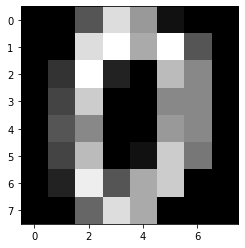

In [11]:
# digits에서 data를 digits_data에 저장
digits_data = digits.data
print(digits_data.shape)

# 자료가 image이므로 matplotlib의 pyplot을 이용하여 1번째 데이터 확인
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')

=> digits_data는 1797개의 데이터를 가지고 있고 
   8x8의 이미지가 flatten되어 64개의 feature로 저장되어 있음을 확인함.

In [5]:
# 정답지인 Label Data 지정
digits_label = digits.target

print(digits_label.shape)

digits_label[0]

(1797,)


0

In [6]:
# Target Names 출력
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### [ 데이터 Describe ]

sklearn에 있는 digit_data를 가지고 손글씨 이미지를 0~9까지 열 가지 카테고리로 분류해보는 작업에서 
digit은 'data', 'target', 'target_names', 'images', 'DESCR'의 정보를 가지고 있고,

features는 8X8의 1797개의 이미지로 flatten되어 64개의 데이터로 저장됨.
labels는 우리가 최종적으로 분류해야 할 0~9까지의 정답을 담고 있음을 확인할 수 있음.

## 4. train, test 데이터 분리

- 모델 학습과 테스트용 문제지와 정답지를 준비
- X_train, X_test, y_train, y_test를 생성

In [19]:
# sklearn의 train_test_split를 이용하여 데이터셋 분리

X_train, X_test, y_train, y_test = train_test_split(digits_data,   # 문제지(feature)
                                                    digits_label,  # 정답값(label)
                                                    test_size=0.2, # test_dataset의 크기
                                                    random_state=7) # 데이터 분리 랜덤성

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


## 5. 학습(Training)

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

Decision Tree 사용해 보기
Random Forest 사용해 보기
SVM 사용해 보기
SGD Classifier 사용해 보기
Logistic Regression 사용해 보기

In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=5000)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.89      1.00      0.94        42
           2       0.93      0.95      0.94        40
           3       0.88      0.88      0.88        34
           4       0.97      0.95      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.84      0.88        43
           9       0.87      0.81      0.84        32

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



/home/myungjin-kim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
# SVM
from sklearn import svm
svm_model = svm.SVC()

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
# SGD Classifier
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
# Logistic Regression
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

# [Project 2] load_wine: 와인 분류

## => 와인의 어떤 특징으로 와인의 종류 분류

(1) 필요한 모듈 import하기

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

(2) 데이터 준비

load_wine 메서드를 사용합니다.

(3) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

    Feature Data 지정하기
    Label Data 지정하기
    Target Names 출력해 보기
    데이터 Describe 해 보기

(4) train, test 데이터 분리

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

(5) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

    Decision Tree 사용해 보기
    Random Forest 사용해 보기
    SVM 사용해 보기
    SGD Classifier 사용해 보기
    Logistic Regression 사용해 보기

(6) 모델을 평가해 보기

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

## 1. 필요한 모듈 import

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# [Project 3] load_breast_cancer: 유방암 진단

## => 데이터로 환자의 유방암 여부 분류

In [ ]:
건강지표에 대한 데이터가 feature로 들어가 있으며, 유방암 여부가 True, False로 label이 됨.

(1) 필요한 모듈 import하기

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

(2) 데이터 준비

load_breast_cancer 메서드를 사용합니다.
(3) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

    Feature Data 지정하기
    Label Data 지정하기
    Target Names 출력해 보기
    데이터 Describe 해 보기

(4) train, test 데이터 분리

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.
(5) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

    Decision Tree 사용해 보기
    Random Forest 사용해 보기
    SVM 사용해 보기
    SGD Classifier 사용해 보기
    Logistic Regression 사용해 보기

(6) 모델을 평가해 보기

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.
마무리

모든 실습을 따라오시느라 정말 수고하셨습니다 👏🏼👏🏼👏🏼

오늘 우리는 어떤 것을 배웠나요?

    [Iris의 세 가지 품종, 분류해 볼까요?] 에서는 scikit-learn의 예제 데이터와 붓꽃 데이터에 대해 알아보았습니다.
    [첫 번째 머신러닝 실습, 간단하고도 빠르게!] 에서는 붓꽃 데이터와 다양한 분류 모델을 이용해 빠른 실습을 진행해봤죠.
    [내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기] 에서는 모델의 성능을 평가하는 다양한 지표에 대해 알아보았습니다.
    마지막 [프로젝트]에서는 직접 다른 데이터들로 실습을 진행해 보았습니다.

어떤가요?
오늘 실습으로 분류에 대한 대략적인 개요와 scikit-learn의 모델 학습 API 형태를 잘 익혀본 것 같습니다.
물론 오늘 다 다루지 못한 분류 알고리즘에 대한 이론이나, 모델의 성능을 보다 높이기 위한 기술적인 부분들은 앞으로 훨씬 많이 배워야 하겠지만요!

앞으로의 과정이 더욱 기대되지 않나요?! 그 전까지 오늘 배운 것들은 꼭 복습하기로 하고, 우리는 다음 시간에 또 만나요!